### Imports

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import glob

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Input, Conv2D, Dropout, Flatten, Activation, MaxPooling2D, Dense
from tensorflow.keras.layers import GlobalAveragePooling2D, BatchNormalization, Concatenate

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

In [2]:
np.random.seed(42)
tf.random.set_seed(42)

### Load Dataset

In [3]:
## in train_set directory
train_images = glob.glob("./plant-project/train_images/*.jpg")

print(len(train_images) )

1821


In [4]:
train_images[:5]

['./plant-project/train_images\\Train_0.jpg',
 './plant-project/train_images\\Train_1.jpg',
 './plant-project/train_images\\Train_10.jpg',
 './plant-project/train_images\\Train_100.jpg',
 './plant-project/train_images\\Train_1000.jpg']

In [5]:
## in test_set directory
test_images = glob.glob("./plant-project/test_images/*.jpg")

print(len(test_images) )

1821


In [6]:
test_images[:5]

['./plant-project/test_images\\Test_0.jpg',
 './plant-project/test_images\\Test_1.jpg',
 './plant-project/test_images\\Test_10.jpg',
 './plant-project/test_images\\Test_100.jpg',
 './plant-project/test_images\\Test_1000.jpg']

In [7]:
"""
리스트 목록보니까
label 위치에 [ healthy, multiple, rust, scab]- 리스트 형식으로 그대로 넣음
classmode에 raw로 넣자
"""

'\n리스트 목록보니까\nlabel 위치에 [ healthy, multiple, rust, scab]- 리스트 형식으로 그대로 넣음\nclassmode에 raw로 넣자\n'

### Visualize Data

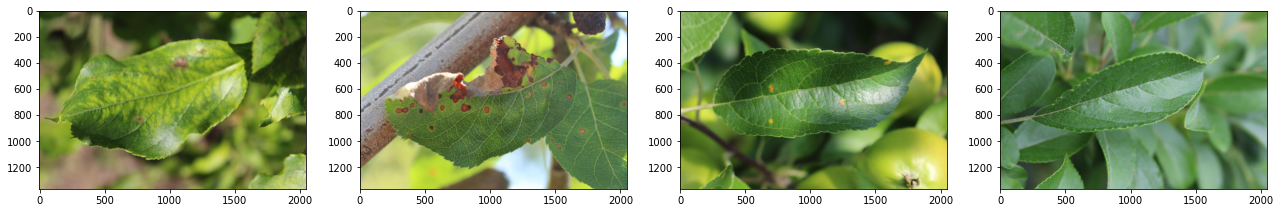

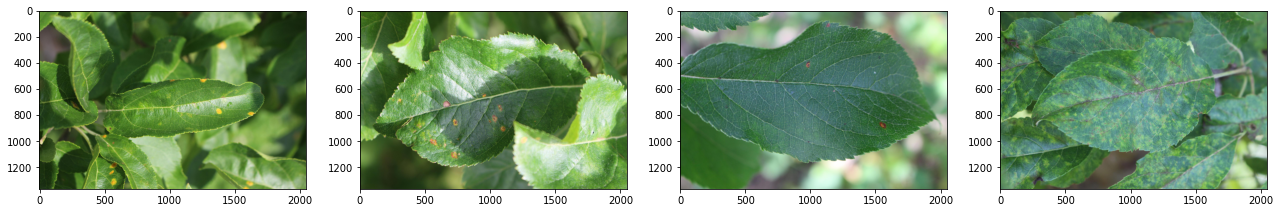

In [8]:
figure, axes = plt.subplots(figsize=(22, 6), nrows=1, ncols=4)
train_images_plot = train_images[:4]
for i in range(4):
    image = cv2.cvtColor(cv2.imread(train_images_plot[i]), cv2.COLOR_BGR2RGB)
    axes[i].imshow(image)
    
figure, axes = plt.subplots(figsize=(22, 6), nrows=1, ncols=4)
test_image_plot = test_images[:4]
for i in range(4):
    image = cv2.cvtColor(cv2.imread(test_image_plot[i]), cv2.COLOR_BGR2RGB)
    axes[i].imshow(image)

### Preprocess data (from dataframe)

In [9]:
"""
엑셀파일 로드 train와 test 데이터프레임 생성
train 데이터 프레임에 label링 합치기
"""

'\n엑셀파일 로드 train와 test 데이터프레임 생성\ntrain 데이터 프레임에 label링 합치기\n'

In [10]:
pd.set_option("display.max_colwidth", 200)

In [11]:
train_csv_label_df = pd.read_csv('./plant-project/train.csv')
train_csv_label_df

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0
...,...,...,...,...,...
1816,Train_1816,0,0,0,1
1817,Train_1817,1,0,0,0
1818,Train_1818,1,0,0,0
1819,Train_1819,0,0,1,0


In [12]:
"""
train_image를 데이터프레임으로 변환 
컬럼에 image_id 로 맞추기
"""

'\ntrain_image를 데이터프레임으로 변환 \n컬럼에 image_id 로 맞추기\n'

In [13]:
train_num_images = []

In [14]:
for i in range (0,len(train_images)):
    
    train_num_li = re.split(r"[\\.]",train_images[i])
    train_num_images.append(train_num_li[2])

In [15]:
train_num_images

['Train_0',
 'Train_1',
 'Train_10',
 'Train_100',
 'Train_1000',
 'Train_1001',
 'Train_1002',
 'Train_1003',
 'Train_1004',
 'Train_1005',
 'Train_1006',
 'Train_1007',
 'Train_1008',
 'Train_1009',
 'Train_101',
 'Train_1010',
 'Train_1011',
 'Train_1012',
 'Train_1013',
 'Train_1014',
 'Train_1015',
 'Train_1016',
 'Train_1017',
 'Train_1018',
 'Train_1019',
 'Train_102',
 'Train_1020',
 'Train_1021',
 'Train_1022',
 'Train_1023',
 'Train_1024',
 'Train_1025',
 'Train_1026',
 'Train_1027',
 'Train_1028',
 'Train_1029',
 'Train_103',
 'Train_1030',
 'Train_1031',
 'Train_1032',
 'Train_1033',
 'Train_1034',
 'Train_1035',
 'Train_1036',
 'Train_1037',
 'Train_1038',
 'Train_1039',
 'Train_104',
 'Train_1040',
 'Train_1041',
 'Train_1042',
 'Train_1043',
 'Train_1044',
 'Train_1045',
 'Train_1046',
 'Train_1047',
 'Train_1048',
 'Train_1049',
 'Train_105',
 'Train_1050',
 'Train_1051',
 'Train_1052',
 'Train_1053',
 'Train_1054',
 'Train_1055',
 'Train_1056',
 'Train_1057',
 'Train_1

In [16]:
train_images

['./plant-project/train_images\\Train_0.jpg',
 './plant-project/train_images\\Train_1.jpg',
 './plant-project/train_images\\Train_10.jpg',
 './plant-project/train_images\\Train_100.jpg',
 './plant-project/train_images\\Train_1000.jpg',
 './plant-project/train_images\\Train_1001.jpg',
 './plant-project/train_images\\Train_1002.jpg',
 './plant-project/train_images\\Train_1003.jpg',
 './plant-project/train_images\\Train_1004.jpg',
 './plant-project/train_images\\Train_1005.jpg',
 './plant-project/train_images\\Train_1006.jpg',
 './plant-project/train_images\\Train_1007.jpg',
 './plant-project/train_images\\Train_1008.jpg',
 './plant-project/train_images\\Train_1009.jpg',
 './plant-project/train_images\\Train_101.jpg',
 './plant-project/train_images\\Train_1010.jpg',
 './plant-project/train_images\\Train_1011.jpg',
 './plant-project/train_images\\Train_1012.jpg',
 './plant-project/train_images\\Train_1013.jpg',
 './plant-project/train_images\\Train_1014.jpg',
 './plant-project/train_images

In [17]:
#col_name = ['image_path','image_id']
train_df_test = pd.DataFrame({'image_path':train_images, 'image_id':train_num_images})

In [18]:
train_df_test.head(20)

,image_path,image_id
0,./plant-project/train_images\Train_0.jpg,Train_0
1,./plant-project/train_images\Train_1.jpg,Train_1
2,./plant-project/train_images\Train_10.jpg,Train_10
3,./plant-project/train_images\Train_100.jpg,Train_100
4,./plant-project/train_images\Train_1000.jpg,Train_1000
5,./plant-project/train_images\Train_1001.jpg,Train_1001
6,./plant-project/train_images\Train_1002.jpg,Train_1002
7,./plant-project/train_images\Train_1003.jpg,Train_1003
8,./plant-project/train_images\Train_1004.jpg,Train_1004
9,./plant-project/train_images\Train_1005.jpg,Train_1005


In [19]:
train_csv_label_df

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0
...,...,...,...,...,...
1816,Train_1816,0,0,0,1
1817,Train_1817,1,0,0,0
1818,Train_1818,1,0,0,0
1819,Train_1819,0,0,1,0


In [20]:
"""
이제 train_df_test와 train_csv_label_df 합쳐서 train_df를 만들어야함
"""

'\n이제 train_df_test와 train_csv_label_df 합쳐서 train_df를 만들어야함\n'

In [21]:
#image_path의 순서가 이상하게 되어있어서 , 데이터프레임 합칠때 이렇게 합치면 순서가 정상으로 됨
train_df = pd.merge(train_csv_label_df, train_df_test, on='image_id')

In [22]:
#완성
train_df.head(15)

,image_id,healthy,multiple_diseases,rust,scab,image_path
0,Train_0,0,0,0,1,./plant-project/train_images\Train_0.jpg
1,Train_1,0,1,0,0,./plant-project/train_images\Train_1.jpg
2,Train_2,1,0,0,0,./plant-project/train_images\Train_2.jpg
3,Train_3,0,0,1,0,./plant-project/train_images\Train_3.jpg
4,Train_4,1,0,0,0,./plant-project/train_images\Train_4.jpg
5,Train_5,1,0,0,0,./plant-project/train_images\Train_5.jpg
6,Train_6,0,1,0,0,./plant-project/train_images\Train_6.jpg
7,Train_7,0,0,0,1,./plant-project/train_images\Train_7.jpg
8,Train_8,0,0,0,1,./plant-project/train_images\Train_8.jpg
9,Train_9,1,0,0,0,./plant-project/train_images\Train_9.jpg


In [23]:
test_csv_label_df = pd.read_csv('./plant-project/test.csv')
test_csv_label_df

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4
...,...
1816,Test_1816
1817,Test_1817
1818,Test_1818
1819,Test_1819


In [24]:
test_num_images = []

In [25]:
for i in range (0,len(test_images)):
    
    test_num_li = re.split(r"[\\.]",test_images[i])
    test_num_images.append(test_num_li[2])

In [26]:
test_num_images

['Test_0',
 'Test_1',
 'Test_10',
 'Test_100',
 'Test_1000',
 'Test_1001',
 'Test_1002',
 'Test_1003',
 'Test_1004',
 'Test_1005',
 'Test_1006',
 'Test_1007',
 'Test_1008',
 'Test_1009',
 'Test_101',
 'Test_1010',
 'Test_1011',
 'Test_1012',
 'Test_1013',
 'Test_1014',
 'Test_1015',
 'Test_1016',
 'Test_1017',
 'Test_1018',
 'Test_1019',
 'Test_102',
 'Test_1020',
 'Test_1021',
 'Test_1022',
 'Test_1023',
 'Test_1024',
 'Test_1025',
 'Test_1026',
 'Test_1027',
 'Test_1028',
 'Test_1029',
 'Test_103',
 'Test_1030',
 'Test_1031',
 'Test_1032',
 'Test_1033',
 'Test_1034',
 'Test_1035',
 'Test_1036',
 'Test_1037',
 'Test_1038',
 'Test_1039',
 'Test_104',
 'Test_1040',
 'Test_1041',
 'Test_1042',
 'Test_1043',
 'Test_1044',
 'Test_1045',
 'Test_1046',
 'Test_1047',
 'Test_1048',
 'Test_1049',
 'Test_105',
 'Test_1050',
 'Test_1051',
 'Test_1052',
 'Test_1053',
 'Test_1054',
 'Test_1055',
 'Test_1056',
 'Test_1057',
 'Test_1058',
 'Test_1059',
 'Test_106',
 'Test_1060',
 'Test_1061',
 'Test_

In [27]:
#col_name = ['image_path','image_id']
test_df_test = pd.DataFrame({'image_path':test_images, 'image_id':test_num_images})

In [28]:
test_df_test.head(20)

,image_path,image_id
0,./plant-project/test_images\Test_0.jpg,Test_0
1,./plant-project/test_images\Test_1.jpg,Test_1
2,./plant-project/test_images\Test_10.jpg,Test_10
3,./plant-project/test_images\Test_100.jpg,Test_100
4,./plant-project/test_images\Test_1000.jpg,Test_1000
5,./plant-project/test_images\Test_1001.jpg,Test_1001
6,./plant-project/test_images\Test_1002.jpg,Test_1002
7,./plant-project/test_images\Test_1003.jpg,Test_1003
8,./plant-project/test_images\Test_1004.jpg,Test_1004
9,./plant-project/test_images\Test_1005.jpg,Test_1005


In [29]:
test_csv_label_df

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4
...,...
1816,Test_1816
1817,Test_1817
1818,Test_1818
1819,Test_1819


In [30]:
test_df = pd.merge(test_df_test, test_csv_label_df, on='image_id')

In [31]:
#완성
test_df.head(15)

,image_path,image_id
0,./plant-project/test_images\Test_0.jpg,Test_0
1,./plant-project/test_images\Test_1.jpg,Test_1
2,./plant-project/test_images\Test_10.jpg,Test_10
3,./plant-project/test_images\Test_100.jpg,Test_100
4,./plant-project/test_images\Test_1000.jpg,Test_1000
5,./plant-project/test_images\Test_1001.jpg,Test_1001
6,./plant-project/test_images\Test_1002.jpg,Test_1002
7,./plant-project/test_images\Test_1003.jpg,Test_1003
8,./plant-project/test_images\Test_1004.jpg,Test_1004
9,./plant-project/test_images\Test_1005.jpg,Test_1005


In [32]:
"""
잘보면 리스트 형식으로 넣은 train_images의 순서와
df으로 받은 label들의 순서가 다르다 
즉 맞춰야한다 - 즉 image_id를 이용해서 맞춰야한다 - 데이터프레임 merge 이용
"""

'\n잘보면 리스트 형식으로 넣은 train_images의 순서와\ndf으로 받은 label들의 순서가 다르다 \n즉 맞춰야한다 - 즉 image_id를 이용해서 맞춰야한다 - 데이터프레임 merge 이용\n'

In [33]:
# 여기서는 image_id를 뺀 train_df가 필요함
train_df

,image_id,healthy,multiple_diseases,rust,scab,image_path
0,Train_0,0,0,0,1,./plant-project/train_images\Train_0.jpg
1,Train_1,0,1,0,0,./plant-project/train_images\Train_1.jpg
2,Train_2,1,0,0,0,./plant-project/train_images\Train_2.jpg
3,Train_3,0,0,1,0,./plant-project/train_images\Train_3.jpg
4,Train_4,1,0,0,0,./plant-project/train_images\Train_4.jpg
...,...,...,...,...,...,...
1816,Train_1816,0,0,0,1,./plant-project/train_images\Train_1816.jpg
1817,Train_1817,1,0,0,0,./plant-project/train_images\Train_1817.jpg
1818,Train_1818,1,0,0,0,./plant-project/train_images\Train_1818.jpg
1819,Train_1819,0,0,1,0,./plant-project/train_images\Train_1819.jpg


In [34]:
train_df_drop = train_df
train_df = train_df_drop.drop(['image_id'], axis=1)


In [35]:
train_df

,healthy,multiple_diseases,rust,scab,image_path
0,0,0,0,1,./plant-project/train_images\Train_0.jpg
1,0,1,0,0,./plant-project/train_images\Train_1.jpg
2,1,0,0,0,./plant-project/train_images\Train_2.jpg
3,0,0,1,0,./plant-project/train_images\Train_3.jpg
4,1,0,0,0,./plant-project/train_images\Train_4.jpg
...,...,...,...,...,...
1816,0,0,0,1,./plant-project/train_images\Train_1816.jpg
1817,1,0,0,0,./plant-project/train_images\Train_1817.jpg
1818,1,0,0,0,./plant-project/train_images\Train_1818.jpg
1819,0,0,1,0,./plant-project/train_images\Train_1819.jpg


In [36]:
def category(healthy, multiple_diseases, rust, scab):
    if healthy == 1:
        return "healthy"
    elif rust == 1:
        return "rust"
    elif scab == 1:
        return "scab"
    else:
        return "multiple_diseases"

train_df["label"] = train_df.apply(lambda x : category(x.healthy, x.multiple_diseases, x.rust, x.scab) , axis = 1)
train_df

,healthy,multiple_diseases,rust,scab,image_path,label
0,0,0,0,1,./plant-project/train_images\Train_0.jpg,scab
1,0,1,0,0,./plant-project/train_images\Train_1.jpg,multiple_diseases
2,1,0,0,0,./plant-project/train_images\Train_2.jpg,healthy
3,0,0,1,0,./plant-project/train_images\Train_3.jpg,rust
4,1,0,0,0,./plant-project/train_images\Train_4.jpg,healthy
...,...,...,...,...,...,...
1816,0,0,0,1,./plant-project/train_images\Train_1816.jpg,scab
1817,1,0,0,0,./plant-project/train_images\Train_1817.jpg,healthy
1818,1,0,0,0,./plant-project/train_images\Train_1818.jpg,healthy
1819,0,0,1,0,./plant-project/train_images\Train_1819.jpg,rust


In [37]:
"""train_df, valid_df = train_test_split(train_df, test_size=0.2, stratify=train_df["label"])

생각해보니 
train_df에서 test_df도 꺼내고 , valid_df 도 꺼내야하네
재균님 아이디어가 도움이 많이 되었네

"""
train_df, valid_df = train_test_split(train_df, test_size=0.2, stratify=train_df["label"])

print(train_df["label"].value_counts())
print(valid_df["label"].value_counts())

rust                 497
scab                 473
healthy              413
multiple_diseases     73
Name: label, dtype: int64
rust                 125
scab                 119
healthy              103
multiple_diseases     18
Name: label, dtype: int64


In [38]:
IMAGE_SIZE = 224
BATCH_SIZE = 64

In [39]:
train_df.shape

(1456, 6)

In [40]:
train_df

,healthy,multiple_diseases,rust,scab,image_path,label
1118,0,0,1,0,./plant-project/train_images\Train_1118.jpg,rust
1771,0,0,1,0,./plant-project/train_images\Train_1771.jpg,rust
179,1,0,0,0,./plant-project/train_images\Train_179.jpg,healthy
91,0,0,0,1,./plant-project/train_images\Train_91.jpg,scab
931,0,0,1,0,./plant-project/train_images\Train_931.jpg,rust
...,...,...,...,...,...,...
433,1,0,0,0,./plant-project/train_images\Train_433.jpg,healthy
756,0,0,0,1,./plant-project/train_images\Train_756.jpg,scab
1815,0,1,0,0,./plant-project/train_images\Train_1815.jpg,multiple_diseases
978,0,0,1,0,./plant-project/train_images\Train_978.jpg,rust


In [41]:
train_generator = ImageDataGenerator(horizontal_flip = True, rescale=1/255.0 )
train_generator_iterator = train_generator.flow_from_dataframe(dataframe=train_df,
                                                               x_col = "image_path",
                                                               y_col = ['healthy', 'multiple_diseases', 'rust', 'scab'],
                                                               target_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE, 
                                                               class_mode="raw")

Found 1456 validated image filenames.


In [42]:
valid_generator = ImageDataGenerator(rescale=1/255.0 )
valid_generator_iterator = valid_generator.flow_from_dataframe(dataframe=valid_df,
                                                               x_col = "image_path",
                                                               y_col = ['healthy', 'multiple_diseases', 'rust', 'scab'],
                                                               target_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE, 
                                                               class_mode="raw")

Found 365 validated image filenames.


* fetch some data

In [43]:
image_array, label_array = next(train_generator_iterator)
print(image_array.shape, label_array.shape)

(64, 224, 224, 3) (64, 4)


### Create Model

In [44]:
# 이미지는 https://arxiv.org/pdf/1409.4842.pdf 이걸보면됨
def inception_module(x, filters_1x1, filters_3x3_reduce, filters_3x3, filters_5x5_reduce, filters_5x5, filters_pool, name):

    #첫번째 1x1 convolutions
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu')(x)
    
    #3X3 적용전 1X1 Conv
    conv_3x3 = Conv2D(filters_3x3_reduce, (1,1), padding='same', activation='relu')(x)
    conv_3x3 = Conv2D(filters_3x3, (3,3), padding='same', activation='relu')(conv_3x3)
    
    # 5X5 적용전 1X1 Conv
    conv_5x5 = Conv2D(filters_5x5_reduce, (1,1), padding='same', activation='relu')(x)
    conv_5x5 = Conv2D(filters_5x5, (5,5), padding='same', activation='relu')(conv_5x5)
    
    # max pooling 
    pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(x)
    pool = Conv2D(filters_pool, (1,1), padding='same', activation='relu')(pool)
    
    #Concatenate
    #axis 0 : batch_size, axis 1 : height, axis2 : width, axis3 : depth
    output = Concatenate(axis=-1, name=name)([conv_1x1, conv_3x3, conv_5x5, pool])
    
    return output



In [45]:
def build_googlenet():
    tf.keras.backend.clear_session()
    
    input_tensor = Input(shape=(224, 224, 3))
    x = Conv2D(64, (7, 7), padding='same', strides=(2, 2), activation='relu')(input_tensor)
    x = MaxPooling2D(pool_size=(3,3), padding='same', strides=(2,2))(x)
    x = Conv2D(filters=64, kernel_size=(1, 1), padding='same', strides=(1,1), activation='relu')(x)
    x = Conv2D(filters=192, kernel_size=(3, 3), padding='same', strides=(1,1), activation='relu')(x)
    x = MaxPooling2D(pool_size=(3,3), padding='same', strides=(2,2))(x)

    #인셉션 모듈 3a
    x = inception_module(x, 64, 96, 128, 16, 32, 32, name='inception_3a')
    #인셉션 모듈 3b
    x = inception_module(x, 128, 128, 192, 32, 96, 64, name='inception_3b')

    x = MaxPooling2D(pool_size=(3, 3), padding='same', strides=(2, 2))(x)

    #인셉션 모듈 4a
    x = inception_module(x, 192, 96, 208, 16, 48, 64, name='inception_4a')
    #인셉션 모듈 4b
    x = inception_module(x, 160, 112, 224, 24, 64, 64, name='inception_4b')
    #인셉션 모듈 4c
    x = inception_module(x, 128, 128, 256, 24, 64, 64, name='inception_4c')
    #인셉션 모듈 4d
    x = inception_module(x, 112, 144, 288, 32, 64, 64, name='inception_4d')
    #인셉션 모듈 4e
    x = inception_module(x, 256, 160, 320, 32, 128, 128, name='inception_4e')

    x = MaxPooling2D(pool_size=(3, 3), padding='same', strides=(2, 2))(x)

    #인셉션 모듈 5s
    x = inception_module(x, 256, 160, 320, 32, 128, 128, name='inception_5a')
    #인셉션 모듈 5b
    x = inception_module(x, 384, 192, 384, 48, 128, 128, name='inception_5b')

    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.4)(x)
    output = Dense(4, activation="softmax")(x)


    model = Model(inputs=input_tensor, outputs=output)

    model.summary()
    return model

model = build_googlenet()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 112, 112, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 56, 56, 64)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 56, 56, 64)   4160        max_pooling2d[0][0]              
______________________________________________________________________________________________

### Compile Model, Train

In [46]:
checkpoint_cb = ModelCheckpoint("my_keras_model.h5", save_best_only=True, verbose=1)
early_stopping_cb = EarlyStopping(patience=12, restore_best_weights=True)
reducelr_cb = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, mode="min", verbose=1)

In [47]:
"""
loss 함수를 일단 categorical_crossentropy 이거로 주는데
class_mode의 raw와 맞다

"""
model.compile(optimizer=Adam(0.0001), loss="categorical_crossentropy", metrics=["AUC"])
history = model.fit(train_generator_iterator, epochs=50, validation_data=valid_generator_iterator,
                   callbacks=[checkpoint_cb, early_stopping_cb, reducelr_cb])

Epoch 1/50
23/23 [==============================] - 26s 826ms/step - loss: 1.2974 - auc: 0.6301 - val_loss: 1.2631 - val_auc: 0.6190

Epoch 00001: val_loss improved from inf to 1.26313, saving model to my_keras_model.h5
Epoch 2/50
23/23 [==============================] - 16s 691ms/step - loss: 1.2436 - auc: 0.6456 - val_loss: 1.2391 - val_auc: 0.6415

Epoch 00002: val_loss improved from 1.26313 to 1.23915, saving model to my_keras_model.h5
Epoch 3/50
23/23 [==============================] - 16s 705ms/step - loss: 1.2437 - auc: 0.6515 - val_loss: 1.2413 - val_auc: 0.6500

Epoch 00003: val_loss did not improve from 1.23915
Epoch 4/50
23/23 [==============================] - 16s 706ms/step - loss: 1.2475 - auc: 0.6360 - val_loss: 1.2396 - val_auc: 0.6390

Epoch 00004: val_loss did not improve from 1.23915
Epoch 5/50
23/23 [==============================] - 16s 696ms/step - loss: 1.2440 - auc: 0.6491 - val_loss: 1.2397 - val_auc: 0.6427

Epoch 00005: val_loss did not improve from 1.23915
E

23/23 [==============================] - 16s 716ms/step - loss: 0.4183 - auc: 0.9671 - val_loss: 0.4776 - val_auc: 0.9590

Epoch 00041: val_loss did not improve from 0.45476
Epoch 42/50
23/23 [==============================] - 17s 735ms/step - loss: 0.4066 - auc: 0.9688 - val_loss: 0.4261 - val_auc: 0.9669

Epoch 00042: val_loss improved from 0.45476 to 0.42612, saving model to my_keras_model.h5
Epoch 43/50
23/23 [==============================] - 16s 713ms/step - loss: 0.3906 - auc: 0.9718 - val_loss: 0.4850 - val_auc: 0.9583

Epoch 00043: val_loss did not improve from 0.42612
Epoch 44/50
23/23 [==============================] - 17s 724ms/step - loss: 0.4947 - auc: 0.9556 - val_loss: 0.5977 - val_auc: 0.9361

Epoch 00044: val_loss did not improve from 0.42612
Epoch 45/50
23/23 [==============================] - 16s 715ms/step - loss: 0.4844 - auc: 0.9570 - val_loss: 0.4544 - val_auc: 0.9638

Epoch 00045: val_loss did not improve from 0.42612
Epoch 46/50
23/23 [========================

### pred

In [48]:
test_df

,image_path,image_id
0,./plant-project/test_images\Test_0.jpg,Test_0
1,./plant-project/test_images\Test_1.jpg,Test_1
2,./plant-project/test_images\Test_10.jpg,Test_10
3,./plant-project/test_images\Test_100.jpg,Test_100
4,./plant-project/test_images\Test_1000.jpg,Test_1000
...,...,...
1816,./plant-project/test_images\Test_995.jpg,Test_995
1817,./plant-project/test_images\Test_996.jpg,Test_996
1818,./plant-project/test_images\Test_997.jpg,Test_997
1819,./plant-project/test_images\Test_998.jpg,Test_998


In [49]:
test_generator = ImageDataGenerator(rescale=1/255.0 )
test_generator_iterator = test_generator.flow_from_dataframe(dataframe=test_df,
                                                               x_col = "image_path",
                                                               target_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE, 
                                                               class_mode=None,
                                                               shuffle = False)

Found 1821 validated image filenames.


In [50]:
model = tf.keras.models.load_model("my_keras_model.h5")
pred = model.predict(test_generator_iterator)
pred

array([[3.70700764e-06, 4.94884104e-02, 9.50490832e-01, 1.71304237e-05],
       [1.03296223e-03, 2.40051359e-01, 7.54235566e-01, 4.68007429e-03],
       [6.11490168e-06, 4.25440595e-02, 9.57413256e-01, 3.64716507e-05],
       ...,
       [1.19049884e-01, 2.91187346e-01, 5.23867071e-01, 6.58957213e-02],
       [3.40747538e-05, 4.84810807e-02, 9.51366365e-01, 1.18523261e-04],
       [5.00831584e-06, 1.12952515e-02, 9.88688767e-01, 1.09039020e-05]],
      dtype=float32)

In [51]:
pred.shape

(1821, 4)

In [52]:
pred_csv = pd.read_csv('./plant-project/sample_submission.csv')

In [53]:
pred_csv.loc[:,'healthy':] = pred
pred_csv

,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,0.000004,0.049488,0.950491,0.000017
1,Test_1,0.001033,0.240051,0.754236,0.004680
2,Test_2,0.000006,0.042544,0.957413,0.000036
3,Test_3,0.003179,0.006286,0.000002,0.990533
4,Test_4,0.001698,0.183376,0.809928,0.004998
...,...,...,...,...,...
1816,Test_1816,0.005369,0.352681,0.617674,0.024275
1817,Test_1817,0.000084,0.133624,0.865814,0.000477
1818,Test_1818,0.119050,0.291187,0.523867,0.065896
1819,Test_1819,0.000034,0.048481,0.951366,0.000119


In [54]:
pred_csv.to_csv('pred_csv_1.csv', index=False)